In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
def simulate_walk(n_steps, step_length=1):
    
    # Start at the origin
    x, y = 0.0, 0.0
    x_path, y_path = [x], [y]

    for _ in range(n_steps):
        # Choose a random direction (angle)
        angle = np.random.uniform(0, 2 * np.pi)
        
        # Calculate the step components
        dx = step_length * np.cos(angle)
        dy = step_length * np.sin(angle)
        
        # Update position
        x += dx
        y += dy
        
        x_path.append(x)
        y_path.append(y)
        
    return np.array(x_path), np.array(y_path)

Saved plot to plots/1a_walk_1000_steps.png


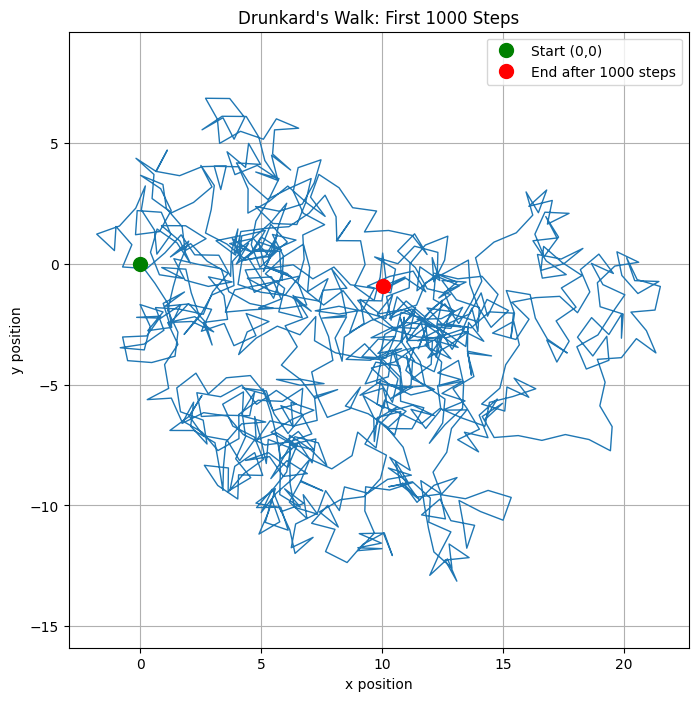

Saved plot to plots/1a_walk_10000_steps.png


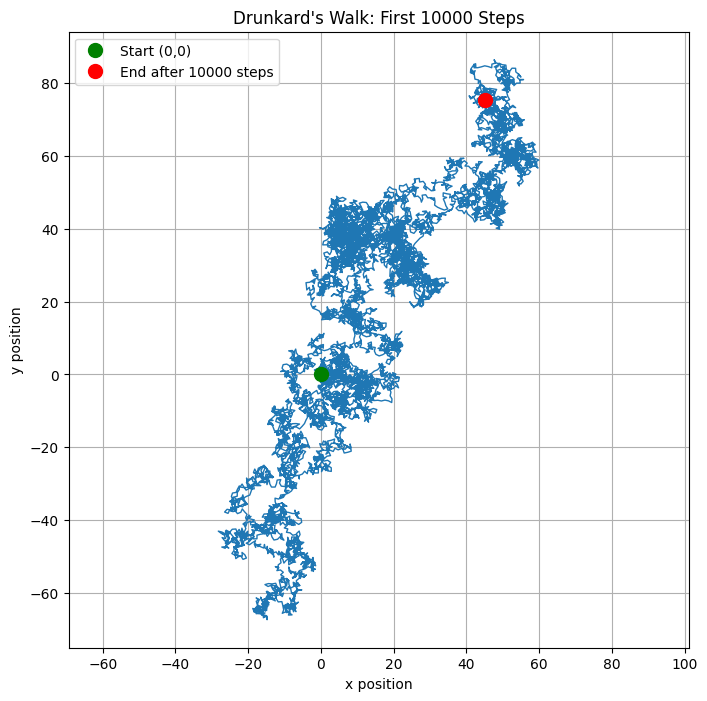

Saved plot to plots/1a_walk_100000_steps.png


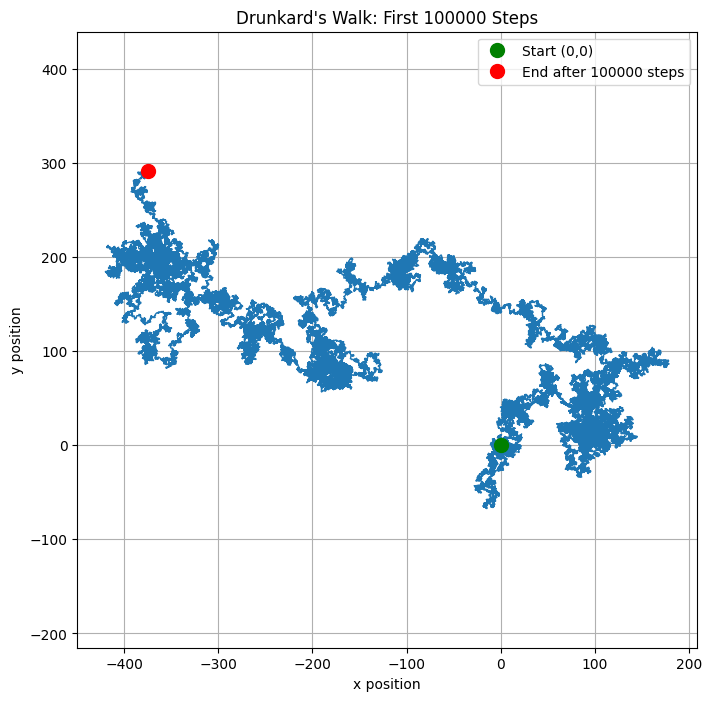

In [ ]:
N_total_steps = 10**5
x_path, y_path = simulate_walk(N_total_steps)

steps_to_plot = [10**3, 10**4, 10**5]

for steps in steps_to_plot:
    plt.figure(figsize=(8, 8))
    plt.plot(x_path[:steps+1], y_path[:steps+1], lw=1)
    # start and end points
    plt.plot(x_path[0], y_path[0], 'go', markersize=10, label='Start (0,0)')
    plt.plot(x_path[steps], y_path[steps], 'ro', markersize=10, label=f'End after {steps} steps')
    
    plt.title(f"Drunkard's Walk: First {steps} Steps")
    plt.xlabel("x position")
    plt.ylabel("y position")
    plt.legend()
    plt.grid(True)
    plt.axis('equal') 
    
    
    filename = f'plots/1a_walk_{steps}_steps.png'
    plt.savefig(filename)
    print(f"Saved plot to {filename}")
    plt.show()

In [ ]:
def run_boundary_simulations(n_runs, n_steps, scenario, radius):
    
    endpoints = []
    
    for _ in range(n_runs):
        x, y = 0.0, 0.0
        
        for step in range(n_steps):
            angle = np.random.uniform(0, 2 * np.pi)
            x_next, y_next = x + np.cos(angle), y + np.sin(angle)
            
            if scenario == 'cliff':
                if np.sqrt(x_next**2 + y_next**2) > radius:
                    
                    break 
                x, y = x_next, y_next

            elif scenario == 'wall':
                if np.sqrt(x_next**2 + y_next**2) <= radius:
                    
                    x, y = x_next, y_next

            elif scenario == 'periodic':
            
                if x_next > radius: x_next -= 2 * radius
                if x_next < -radius: x_next += 2 * radius
                if y_next > radius: y_next -= 2 * radius
                if y_next < -radius: y_next += 2 * radius
                x, y = x_next, y_next

            elif scenario == 'one_sided':
                
                if x_next > radius: 
                    x_next -= 2 * radius
                if x_next < -radius: 
                    x_next = x
                if abs(y_next) > radius:
                    y_next = y
                x, y = x_next, y_next

            elif scenario == 'unbounded':
                x, y = x_next, y_next

        endpoints.append((x, y))
        
    return np.array(endpoints)

Running simulation for: iv) No Boundary
Saved histogram to plots/1b_unbounded.png



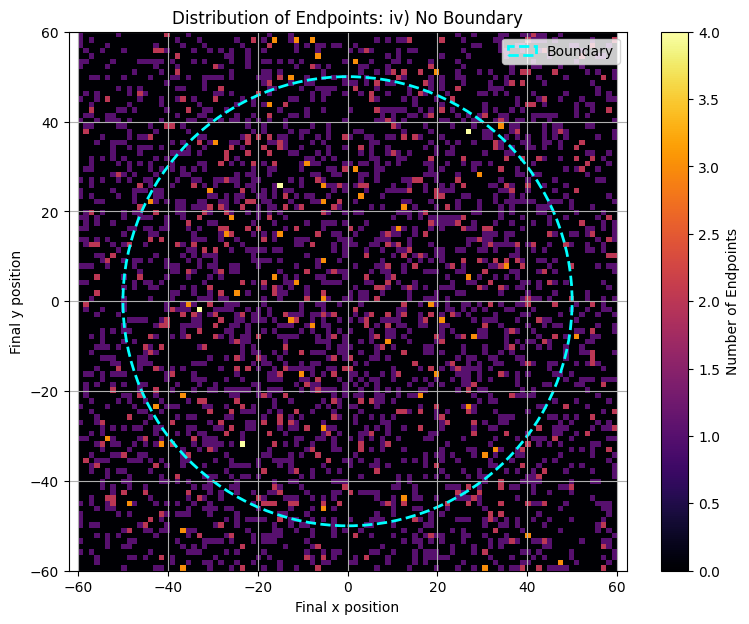

Running simulation for: i) Cliff
Saved histogram to plots/1b_cliff.png



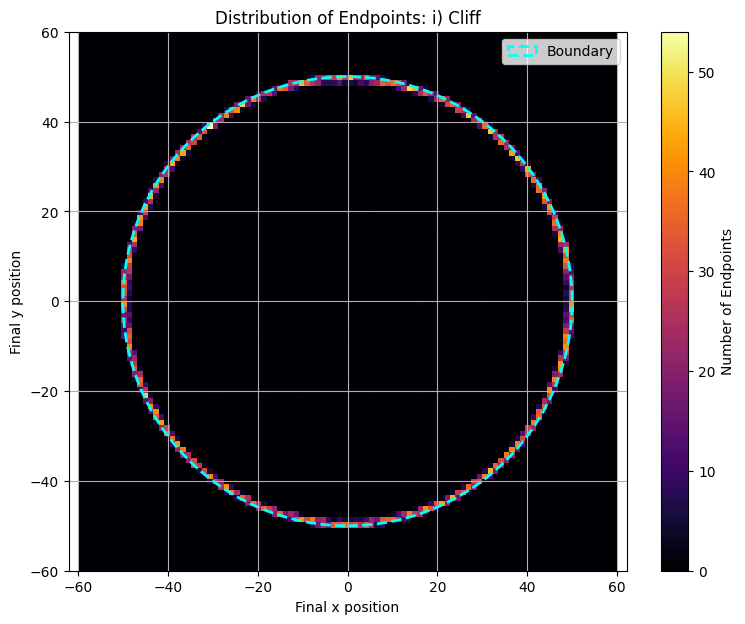

Running simulation for: ii) Wall
Saved histogram to plots/1b_wall.png



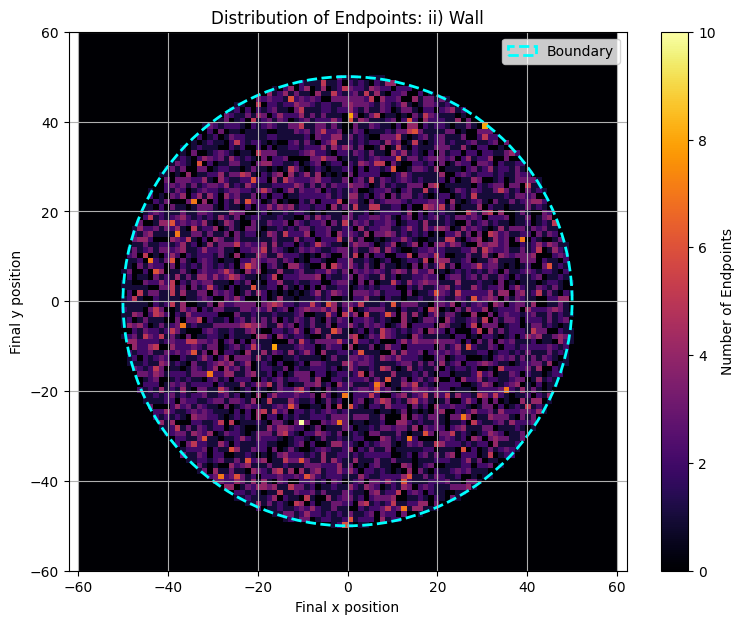

Running simulation for: iii) Periodic Boundary
Saved histogram to plots/1b_periodic.png



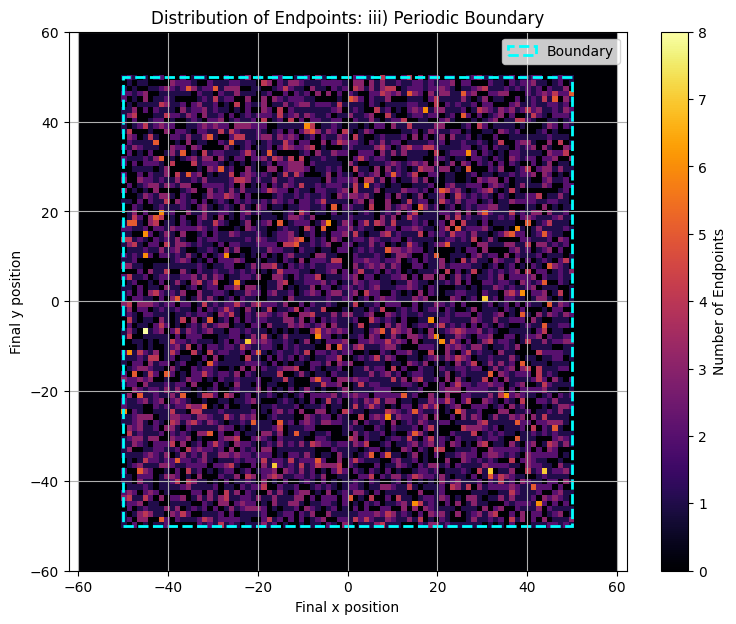

Running simulation for: v) One-Sided Periodic
Saved histogram to plots/1b_one_sided.png



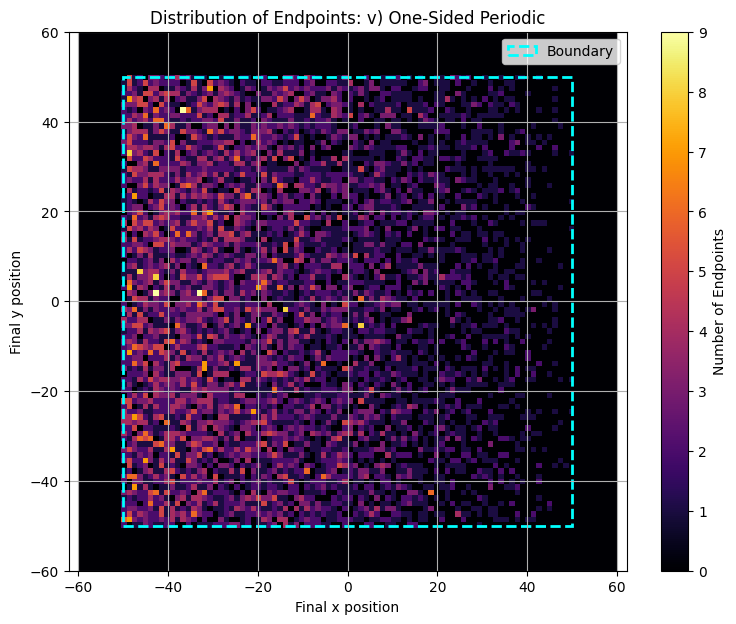

In [ ]:
N_RUNS = 10**4
N_STEPS = 10**4
RADIUS = 50  

scenarios = {
    'iv) No Boundary': 'unbounded',
    'i) Cliff': 'cliff',
    'ii) Wall': 'wall',
    'iii) Periodic Boundary': 'periodic',
    'v) One-Sided Periodic': 'one_sided'
}

for title, scenario_key in scenarios.items():
    print(f"Running simulation for: {title}")
    endpoints = run_boundary_simulations(N_RUNS, N_STEPS, scenario_key, RADIUS)
    
    
    x_endpoints = endpoints[:, 0]
    y_endpoints = endpoints[:, 1]
    
    # plot
    plt.figure(figsize=(9, 7))
    
    plot_range = [[-RADIUS*1.2, RADIUS*1.2], [-RADIUS*1.2, RADIUS*1.2]]
    plt.hist2d(x_endpoints, y_endpoints, bins=100, cmap='inferno', range=plot_range)
    
    
    if 'Periodic' not in title: # Circle for cliff, wall
        boundary = plt.Circle((0, 0), RADIUS, color='cyan', fill=False, lw=2, linestyle='--', label='Boundary')
        plt.gca().add_artist(boundary)
    else: # Square for periodic
        boundary = plt.Rectangle((-RADIUS, -RADIUS), 2*RADIUS, 2*RADIUS, color='cyan', fill=False, lw=2, linestyle='--', label='Boundary')
        plt.gca().add_artist(boundary)

    plt.colorbar(label='Number of Endpoints')
    plt.title(f"Distribution of Endpoints: {title}")
    plt.xlabel("Final x position")
    plt.ylabel("Final y position")
    plt.legend(handles=[boundary])
    plt.grid(True)
    plt.axis('equal')
    
    filename = f"plots/1b_{scenario_key}.png"
    plt.savefig(filename)
    print(f"Saved histogram to {filename}\n")
    plt.show()